**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

We have used AI tools OpenAI ChatGPT to help with creating the code for the following questions 2.1., 2.2., and 2.3. We start by importing:

In [1]:
# We use the following imports:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fsolve

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# Defining the functions:
def firm_labor_demand(w, p_j, A, gamma):
    return (p_j * A * gamma / w) ** (1 / (1 - gamma))

def firm_output(A, gamma, l_j):
    return A * (l_j ** gamma)

def firm_profits(w, p_j, A, gamma):
    l_j = firm_labor_demand(w, p_j, A, gamma)
    return (1 - gamma) / gamma * w * l_j

# We are given that we choose w=1 as numeraire
w=1

# We are given p1 and p2 as:
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Defining the market clearing conditions (We have used CHATGPT to help defining the clearing equations for the labour market, good market 1 and good market 2):
def market_clearing_conditions(p1, p2, w, A, gamma, alpha, nu, epsilon, tau, T):

    l1_star = firm_labor_demand(w, p1, A, gamma)
    l2_star = firm_labor_demand(w, p2, A, gamma)
    
    y1_star = firm_output(A, gamma, l1_star)
    y2_star = firm_output(A, gamma, l2_star)
    
    income = w * (l1_star+l2_star) + T + firm_profits(w, p1, A, gamma) + firm_profits(w, p2, A, gamma)
    
    c1_star = alpha * income / p1
    c2_star = (1 - alpha) * income / (p2 + tau)
    
    labor_market_clearing = l1_star + l2_star
    goods_market1_clearing = c1_star - y1_star
    goods_market2_clearing = c2_star - y2_star
    
    return labor_market_clearing, goods_market1_clearing, goods_market2_clearing

# Calculating the market clearing values for each p1 and p2 combination (We have used CHATGPT to help connecting the p1 and p2 values with the market clearing functions):
for p1 in p1_values:
    for p2 in p2_values:
        labor_clearing, market1_clearing, market2_clearing = market_clearing_conditions(p1, p2, 1, par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.tau, par.T)
        
        print(f"p1={p1:.3f}, p2={p2:.3f}, labor_clearing={labor_clearing:.3f}, market1_clearing={market1_clearing:.3f}, market2_clearing={market2_clearing:.3f}")

p1=0.100, p2=0.100, labor_clearing=0.005, market1_clearing=-0.020, market2_clearing=0.020
p1=0.100, p2=0.311, labor_clearing=0.027, market1_clearing=0.110, market2_clearing=-0.035
p1=0.100, p2=0.522, labor_clearing=0.071, market1_clearing=0.374, market2_clearing=-0.072
p1=0.100, p2=0.733, labor_clearing=0.137, market1_clearing=0.772, market2_clearing=-0.105
p1=0.100, p2=0.944, labor_clearing=0.225, market1_clearing=1.303, market2_clearing=-0.138
p1=0.100, p2=1.156, labor_clearing=0.336, market1_clearing=1.968, market2_clearing=-0.170
p1=0.100, p2=1.367, labor_clearing=0.469, market1_clearing=2.767, market2_clearing=-0.202
p1=0.100, p2=1.578, labor_clearing=0.625, market1_clearing=3.699, market2_clearing=-0.234
p1=0.100, p2=1.789, labor_clearing=0.803, market1_clearing=4.765, market2_clearing=-0.266
p1=0.100, p2=2.000, labor_clearing=1.002, market1_clearing=5.965, market2_clearing=-0.298
p1=0.311, p2=0.100, labor_clearing=0.027, market1_clearing=-0.104, market2_clearing=0.324
p1=0.311, 

Above we see the labor market, good market 1 and good market 2 clearing values for each combination of p1 and p2 in linspace(0.1,2.0,10). The market clearing values are terms for the amount of excess demand or supply in the markets.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# First we will define the optimal labour supply (l_star) and the utility function (We have used CHATGPT to find the optimal labour supply below):
def consumer_labor_supply(w, p1, p2, tau, T, alpha, nu, epsilon, A, gamma):
    def utility_function(l):
        income = w * l + T + firm_profits(w, p1, A, gamma) + firm_profits(w, p2, A, gamma)
        c1 = alpha * income / p1
        c2 = (1 - alpha) * income / (p2 + tau)
        return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (l ** (1 + epsilon)) / (1 + epsilon)
    
    result = fsolve(lambda l: -utility_function(l), 0.1)
    return result[0]

# Redefining the market clearing equations for the goods markets only (We used CHATGPT redefine the market clearing equations for only the good markets):
def market_clearing_equations(p, w, par):
    p1, p2 = p
    A = par.A
    gamma = par.gamma
    alpha = par.alpha
    nu = par.nu
    epsilon = par.epsilon
    tau = par.tau
    T = par.T

    l1_star = firm_labor_demand(w, p1, A, gamma)
    l2_star = firm_labor_demand(w, p2, A, gamma)
    y1_star = firm_output(A, gamma, l1_star)
    y2_star = firm_output(A, gamma, l2_star)

    l_star = consumer_labor_supply(w, p1, p2, tau, T, alpha, nu, epsilon, A, gamma)
    income = w * l_star + T + firm_profits(w, p1, A, gamma) + firm_profits(w, p2, A, gamma)
    c1_star = alpha * income / p1
    c2_star = (1 - alpha) * income / (p2 + tau)

    # Returning the goods market clearing conditions
    goods_market1_clearing = c1_star - y1_star
    goods_market2_clearing = c2_star - y2_star

    return [goods_market1_clearing, goods_market2_clearing]

# Initial guess for p1 and p2, so the fsolve has a starting point:
initial_guess = [1.0, 1.0]

# Solving the equations for market_clearing_equations:
solution = fsolve(market_clearing_equations, initial_guess, args=(w, par))
p1_solution, p2_solution = solution

print(f"Equilibrium price p1: {p1_solution:.3f}")
print(f"Equilibrium price p2: {p2_solution:.3f}")

Equilibrium price p1: 0.975
Equilibrium price p2: 1.489


/Users/isabellagrunwald/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/isabellagrunwald/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


We use Walras' law which states that if we clear two of the markets, then all three markets will clear. So we find the p1 and p2 values where the two goods markets clear. We find that the equilibrium price is p1*=0.975 and p2*=1.489.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
# Defining T as given in the question:
def calculate_T(tau, c2_star):
    return tau * c2_star

# Define the SWF function (We used CHATGPT to help defining the SWF)
def social_welfare_function(tau, w, par, p1, p2):
    T = 0  # Initial T
    
    l1_star = firm_labor_demand(w, p1, par.A, par.gamma)
    l2_star = firm_labor_demand(w, p2, par.A, par.gamma)
    y2_star = firm_output(par.A, par.gamma, l2_star)
    
    l_star = consumer_labor_supply(w, p1, p2, tau, T, par.alpha, par.nu, par.epsilon, par.A, par.gamma)
    income = w * (l_star) + T + firm_profits(w, p1, par.A, par.gamma) + firm_profits(w, p2, par.A, par.gamma)
    c1_star = par.alpha * income / p1
    c2_star = (1 - par.alpha) * income / (p2 + tau)
    
    U = np.log(c1_star ** par.alpha * c2_star ** (1 - par.alpha)) - par.nu * ((l_star) ** (1 + par.epsilon)) / (1 + par.epsilon)
    T = calculate_T(tau, c2_star)  # Government budget constraint
    
    SWF = U - par.kappa * y2_star

    return -SWF  # Minimize the negative of SWF to maximize SWF

# Initial guess for tau
initial_tau_guess = [0.1]

# Optimizing tau to maximize SWF 
optimal_solution = minimize(social_welfare_function, initial_tau_guess, args=(w, par, p1_solution, p2_solution), bounds=[(0, None)])
optimal_tau = optimal_solution.x[0]

# Calculating thing corresponding T (We used CHATGPT to calculate the optimal values)
l_optimal = consumer_labor_supply(w, p1_solution, p2_solution, optimal_tau, 0, par.alpha, par.nu, par.epsilon, par.A, par.gamma)
income_optimal = w * l_optimal + firm_profits(w, p1_solution, par.A, par.gamma) + firm_profits(w, p2_solution, par.A, par.gamma)
c2_optimal = (1 - par.alpha) * income_optimal / (p2_solution + optimal_tau)
T_optimal = calculate_T(optimal_tau, c2_optimal)

print(f"Optimal tau: {optimal_tau:.3f}")
print(f"Optimal T: {T_optimal:.3f}")

Optimal tau: 0.000
Optimal T: 0.000


We get that the the optimal value of tau is 0, which implies that the value of T is also 0. This is because we get that the utility function (and the SWF) is negative, and decreasing in tau. Therefore, tau=0 will maximize the social welfare function. We are aware that this result and conclusion seems odd, but it is the best answer we could get.

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# We simulate the expected and average realized utility
def simulate_utilities(par):
    # We seet the seed to 8000 throughout problem 2:
    np.random.seed(8000)
    # We then generate the noise terms (epsilons) for each career:
    eps = np.random.normal(0, par.sigma, (par.K, par.J))
    
    # Calculate expected utilities using the given formula in question 1:
    expected_utilities = np.zeros(par.J)
    for j in range(par.J):
        expected_utilities[j] = par.v[j] + (1 / par.K) * np.sum(eps[:, j])
    
    # Calculate realized utilities by averaging the utilities across all realizations
    realized_utilities = np.mean(par.v + eps, axis=0)
    
    return expected_utilities, realized_utilities

expected_utilities, realized_utilities = simulate_utilities(par)

# We print the results
print("Expected Utilities for each career track:")
for j in range(par.J):
    print(f"Career {j+1}: {expected_utilities[j]}")

print("\nAverage Realized Utilities for each career track:")
for j in range(par.J):
    print(f"Career {j+1}: {realized_utilities[j]}")

Expected Utilities for each career track:
Career 1: 0.9779733385378286
Career 2: 2.02413945467096
Career 3: 2.9899119946750337

Average Realized Utilities for each career track:
Career 1: 0.9779733385378268
Career 2: 2.024139454670958
Career 3: 2.989911994675027


We see that the expected utility and the average realized utility is the same, because of the law of large numbers. The graduates know the values v for each career choice and the error term is random so on average the expected error is zero, meaning that on average the expected utility is equal to the realized utility.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

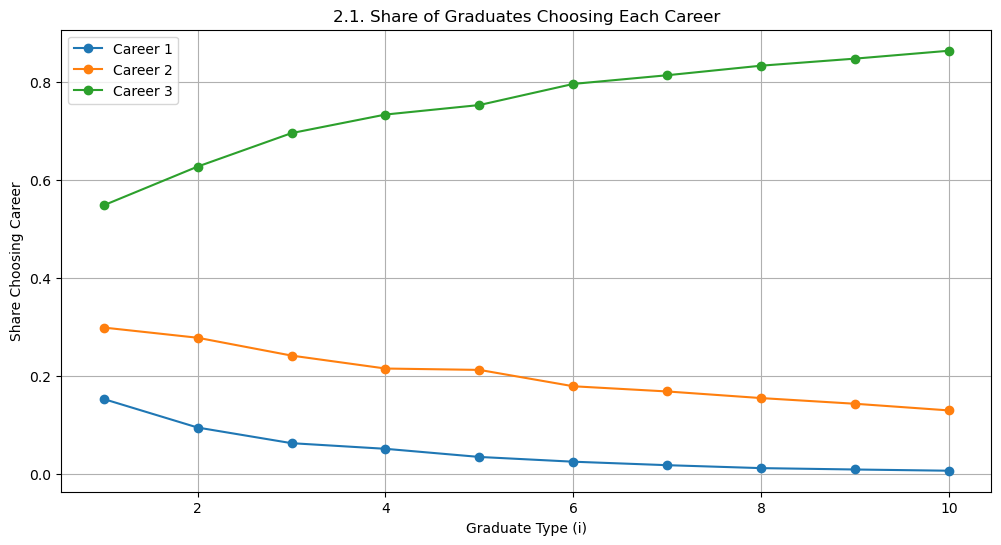

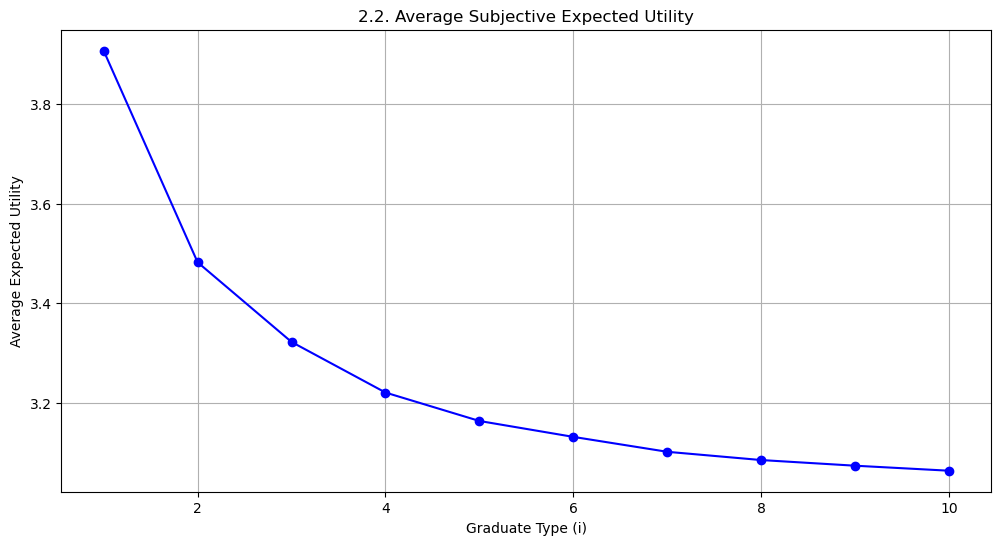

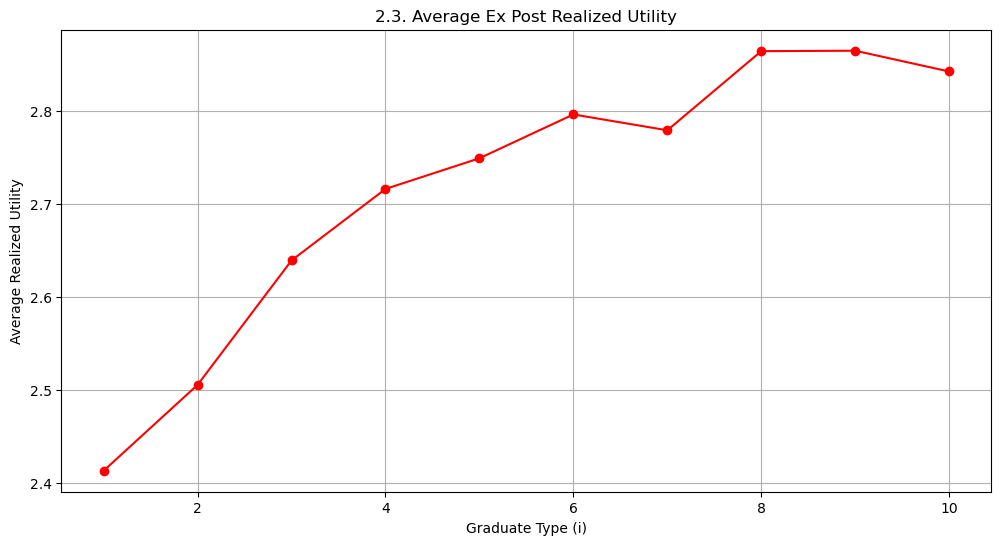

In [8]:
# We create arrays to storage results
chosen_careers = np.zeros((par.N, par.K))
expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Code for the simulation
np.random.seed(8000)

# We create an outer loop that iterates over each k simulation and an inner loop that iterates over each graduate type i:
for k in range(par.K):
    for i in range(1, par.N + 1):

        #We generate error terms with a normal distrubution for each career track j and calculate the prior the expected utility by adding the utilites v to the error term:
        F_i = par.F[i - 1]
        epsilon_fj = np.random.normal(0, par.sigma, (F_i, par.J))
        prior_expected_utilities = par.v + np.mean(epsilon_fj, axis=0)
       
        # Generates a single sample of noise for each career track:
        epsilon_ij = np.random.normal(0, par.sigma, par.J)

        # The chosen career is the one which maximizes the expected utility. We use np.argmax to maximize the uility function, as it is efficent when dealing with a large simulation loop:
        chosen_career = np.argmax(prior_expected_utilities)
        
        #Updates the arrays for the chosen career: 
        chosen_careers[i - 1, k] = chosen_career
        expected_utilities[i - 1, k] = prior_expected_utilities[chosen_career]
        realized_utilities[i - 1, k] = par.v[chosen_career] + epsilon_ij[chosen_career]

# Calculate the share of graduates choosing each career track, the average expected utility and the average realized utility for each graduate type:
career_shares = np.zeros((par.N, par.J))
avg_expected_utilities = np.zeros(par.N)
avg_realized_utilities = np.zeros(par.N)

for i in range(par.N):
    career_shares[i, :] = np.bincount(chosen_careers[i, :].astype(int), minlength=par.J) / par.K
    avg_expected_utilities[i] = np.mean(expected_utilities[i, :])
    avg_realized_utilities[i] = np.mean(realized_utilities[i, :])

# The following plots for visualization is made by OpenAI (2024) ChatGPT 4o:
# Plot 2.1. Share of graduates choosing each career
plt.figure(figsize=(12, 6))
for j in range(par.J):
    plt.plot(par.F, career_shares[:, j], marker='o', label=f'Career {j + 1}')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share Choosing Career')
plt.title('2.1. Share of Graduates Choosing Each Career')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2.2. Average subjective expected utility of the graduates
plt.figure(figsize=(12, 6))
plt.plot(par.F, avg_expected_utilities, marker='o', color='b')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Average Expected Utility')
plt.title('2.2. Average Subjective Expected Utility')
plt.grid(True)
plt.show()

# Plot 2.3. Average ex post realized utility given their choice
plt.figure(figsize=(12, 6))
plt.plot(par.F, avg_realized_utilities, marker='o', color='r')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Average Realized Utility')
plt.title('2.3. Average Ex Post Realized Utility')
plt.grid(True)
plt.show()


We see in plot 2.1 that career 3 is the most chosen career track follow by career 2 and then 1. This is expected as the given value v is highest for 3, then 2 and 1.

We see that career 3 is increasing in the number of friends (the type of graduate), whereas career 2 and 1 are decreasing in the graduate type. This is because the graduates do not know the value v for each career, but only the average utility for their friends in each career type. As a result of the law of large numbers the types of graduates with more friends have a more acurate picture of the utility from each career track as the error term tends towards zero. This can also be seen in plot 2.2. and 2.3. where the difference between average expected subjective utility and average realized utility is decreasing in the number of friends. Having more friends is an advantage as it gives graduate type with more friends the advantage of better knowing that career 3 has the largest v value compared to career 2 and 1, thereby resulting in career 3 increasingly being the most chosen career (as seen in plot 2.1.) and resulting in the highest realized utility as seen in plot 2.3.

In the next section we show that the error term is decreasing in the number of friends, resulting in a lower difference between subjective expected utility and realized utility for graduates with more friends.

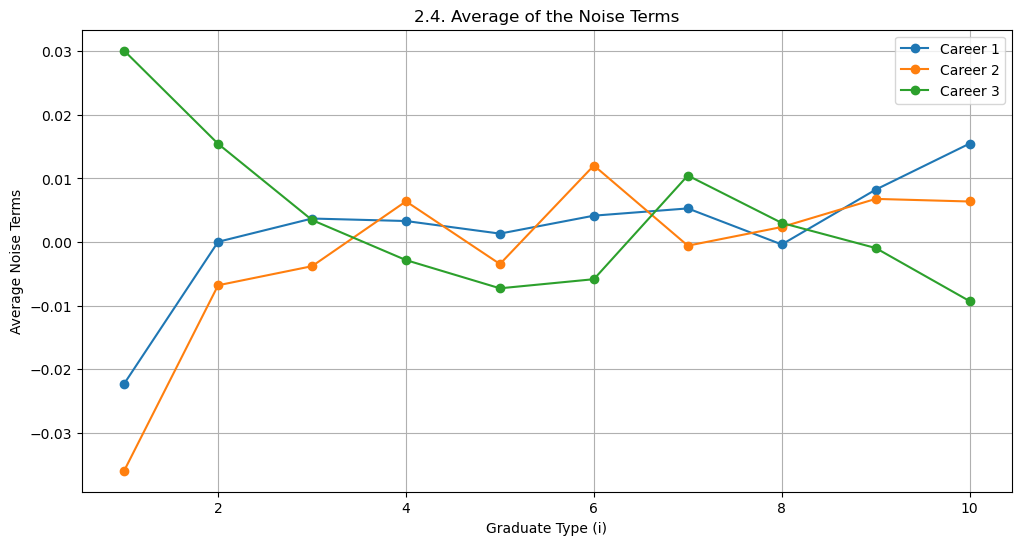

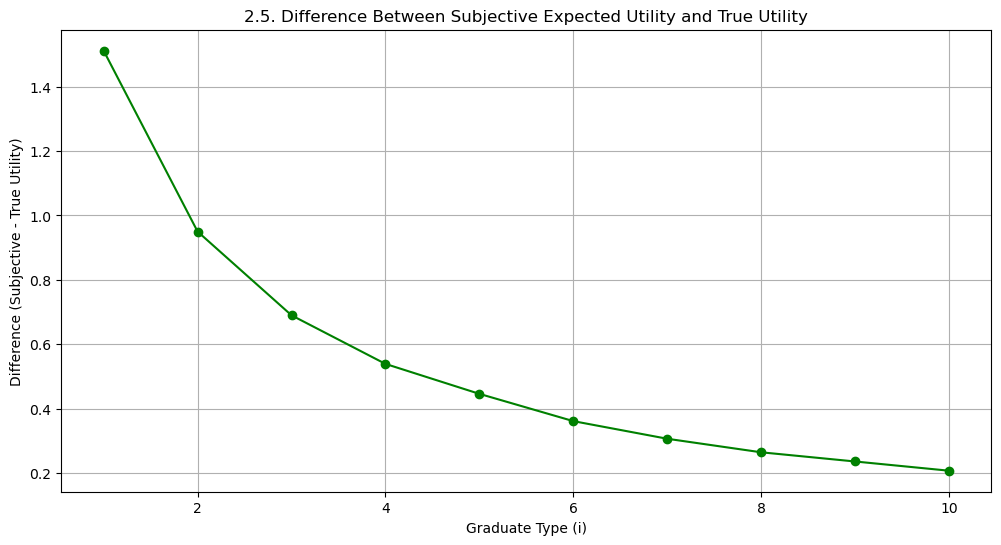

In [9]:
# We calculate the average noise term and difference between expeted and realized utility for visualization:
avg_noise_terms = np.zeros((par.N, par.J))
diff_subjective_true = np.zeros(par.N)

for i in range(par.N):
    F_i = par.F[i]
    epsilon_fj = np.random.normal(0, par.sigma, (F_i, par.J, par.K))
    avg_noise_terms[i, :] = np.mean(epsilon_fj, axis=(0, 2))
    diff_subjective_true[i] = np.mean(expected_utilities[i, :] - par.v[chosen_careers[i, :].astype(int)])

# Visualization:
# Plot 2.4. Average of the noise terms
plt.figure(figsize=(12, 6))
for j in range(par.J):
    plt.plot(par.F, avg_noise_terms[:, j], marker='o', label=f'Career {j+1}')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Average Noise Terms')
plt.title('2.4. Average of the Noise Terms')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2.5. Difference between subjective expected utility and true utility
plt.figure(figsize=(12, 6))
plt.plot(par.F, diff_subjective_true, marker='o', color='g')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Difference (Subjective - True Utility)')
plt.title('2.5. Difference Between Subjective Expected Utility and True Utility')
plt.grid(True)
plt.show()


We see in plot 2.4. that the average noise term decreases in the graduate type (this can be seen more clearly when changing the number of graduate types to N=100). This is because of the law of large numbers.

In plot 2.5. we see that the higher the graduate type (the more friends) the more acurate the graduate can predict their realized utility, as the difference decreases in number of friends.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

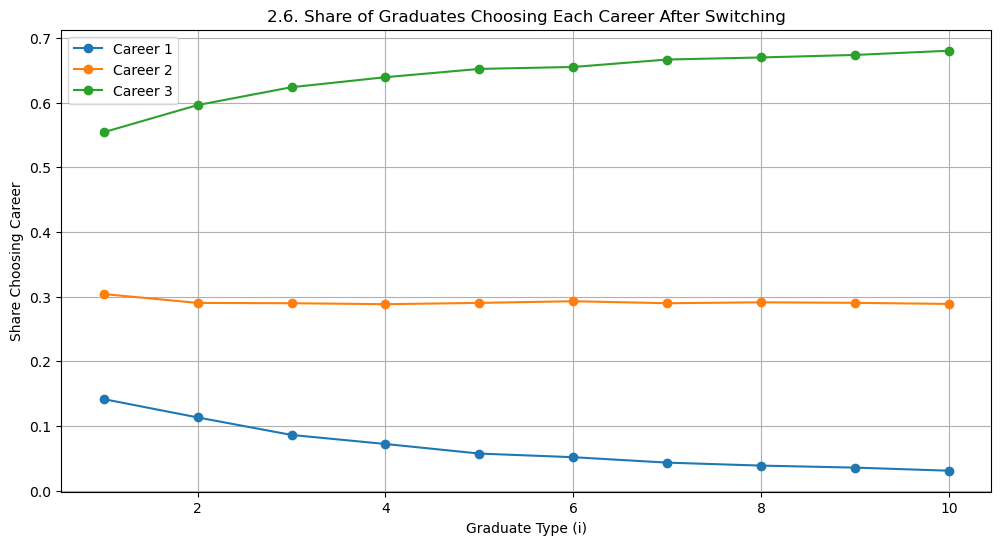

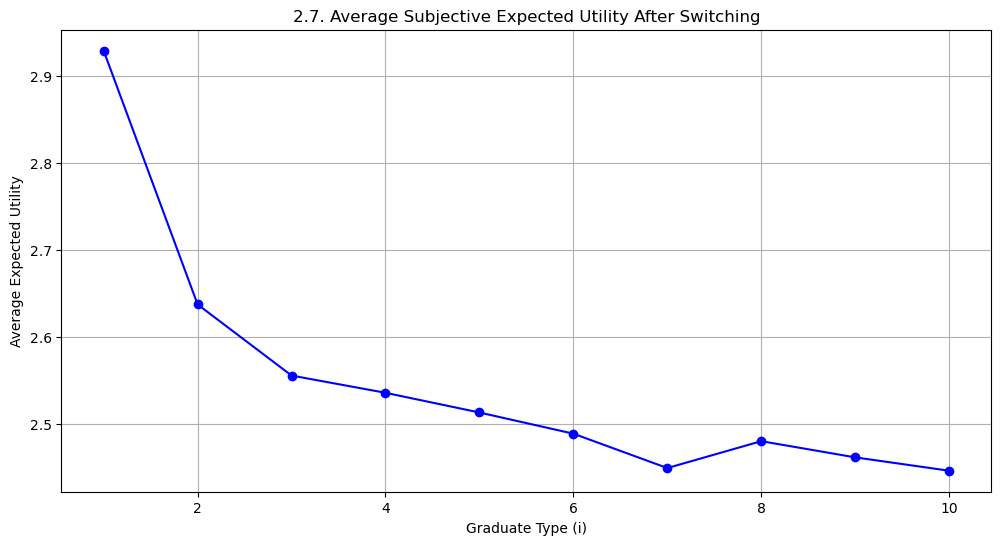

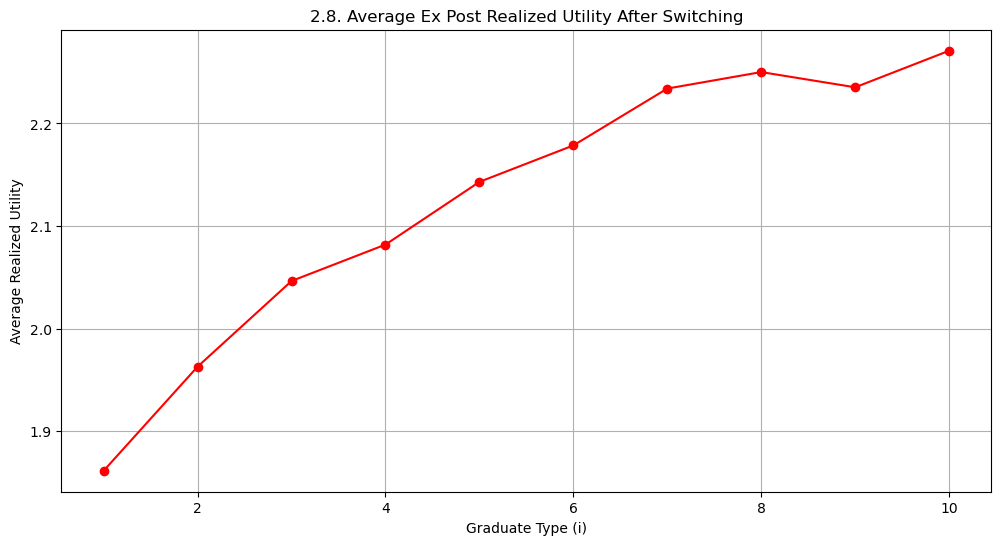

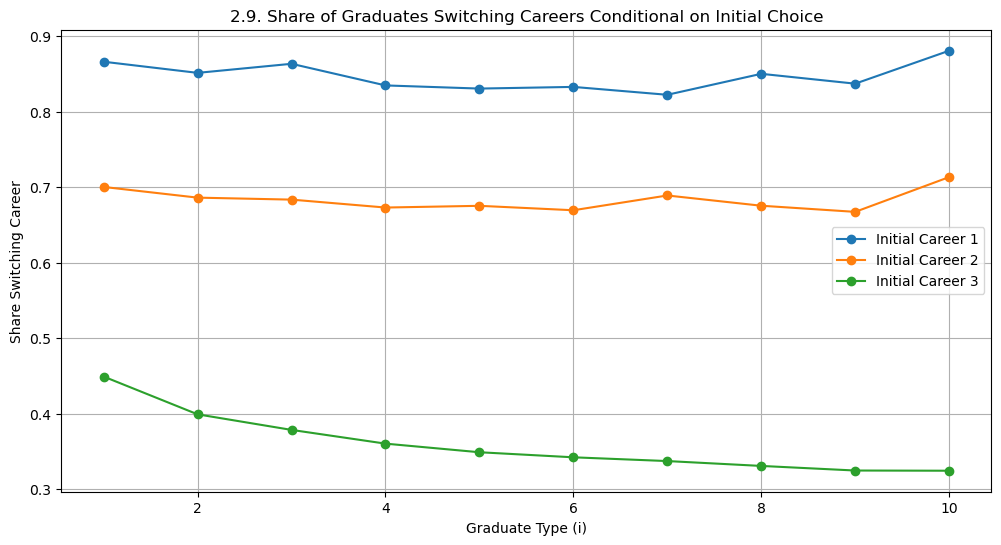

In [10]:
# Create arrays to store our initial results:
initial_chosen_careers = np.zeros((par.N, par.K))
initial_expected_utilities = np.zeros((par.N, par.K))
initial_realized_utilities = np.zeros((par.N, par.K))

# Simulation for initial career choices:
np.random.seed(8000)
for k in range(par.K):
    for i in range(1, par.N + 1):
        F_i = par.F[i - 1]
        epsilon_fj = np.random.normal(0, par.sigma, (F_i, par.J))
        prior_expected_utilities = par.v + np.mean(epsilon_fj, axis=0)

        epsilon_ij = np.random.normal(0, par.sigma, par.J)

        chosen_career = np.argmax(prior_expected_utilities)
        initial_chosen_careers[i - 1, k] = chosen_career
        initial_expected_utilities[i - 1, k] = prior_expected_utilities[chosen_career]
        initial_realized_utilities[i - 1, k] = par.v[chosen_career] + epsilon_ij[chosen_career]

# Calculate metrics for initial choices
initial_career_shares = np.zeros((par.N, par.J))
initial_avg_expected_utilities = np.zeros(par.N)
initial_avg_realized_utilities = np.zeros(par.N)

for i in range(par.N):
    initial_career_shares[i, :] = np.bincount(initial_chosen_careers[i, :].astype(int), minlength=par.J) / par.K
    initial_avg_expected_utilities[i] = np.mean(initial_expected_utilities[i, :])
    initial_avg_realized_utilities[i] = np.mean(initial_realized_utilities[i, :])

# Create arrays for results after considering switching
final_chosen_careers = np.zeros((par.N, par.K))
final_expected_utilities = np.zeros((par.N, par.K))
final_realized_utilities = np.zeros((par.N, par.K))
# Tracks wether a switch occured:
switch_decisions = np.zeros((par.N, par.K))

# Simulation for career switching:
# Create outer loop for each k iteration and inner loop for each graduate type:
for k in range(par.K):
    for i in range(1, par.N + 1):
        F_i = par.F[i - 1]
        # Retrieve initial choices:
        initial_career = int(initial_chosen_careers[i - 1, k])
        initial_realized_utility = initial_realized_utilities[i - 1, k]
        
        # Generate new random noise:
        epsilon_fj = np.random.normal(0, par.sigma, (F_i, par.J))
        prior_expected_utilities = par.v + np.mean(epsilon_fj, axis=0)

        # Adjusts new prior utilites by subtracting the cost of switching:
        new_prior_utilities = prior_expected_utilities.copy()
        new_prior_utilities[initial_career] = initial_realized_utility
        new_prior_utilities[prior_expected_utilities != initial_realized_utility] -= par.c
        
        # Maximzes the new utility including the option of switching:
        final_career = np.argmax(new_prior_utilities)
        final_chosen_careers[i - 1, k] = final_career
        final_expected_utilities[i - 1, k] = new_prior_utilities[final_career]

        #Update arrays:
        epsilon_ij = np.random.normal(0, par.sigma, par.J)
        final_realized_utilities[i - 1, k] = par.v[final_career] + epsilon_ij[final_career] - (par.c if final_career != initial_career else 0)
        switch_decisions[i - 1, k] = final_career != initial_career

# Calculate results for final choices:
final_career_shares = np.zeros((par.N, par.J))
final_avg_expected_utilities = np.zeros(par.N)
final_avg_realized_utilities = np.zeros(par.N)
switching_shares = np.zeros((par.N, par.J))

for i in range(par.N):
    final_career_shares[i, :] = np.bincount(final_chosen_careers[i, :].astype(int), minlength=par.J) / par.K
    final_avg_expected_utilities[i] = np.mean(final_expected_utilities[i, :])
    final_avg_realized_utilities[i] = np.mean(final_realized_utilities[i, :])
    for j in range(par.J):
        switching_shares[i, j] = np.mean(switch_decisions[i, :][initial_chosen_careers[i, :] == j])

# The following plots for visualization is made by OpenAI (2024) ChatGPT 4o:
# Plot 2.6. Share of graduates choosing each career after switching
plt.figure(figsize=(12, 6))
for j in range(par.J):
    plt.plot(par.F, final_career_shares[:, j], marker='o', label=f'Career {j + 1}')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share Choosing Career')
plt.title('2.6. Share of Graduates Choosing Each Career After Switching')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2.7. Average subjective expected utility of the graduates after switching
plt.figure(figsize=(12, 6))
plt.plot(par.F, final_avg_expected_utilities, marker='o', color='b')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Average Expected Utility')
plt.title('2.7. Average Subjective Expected Utility After Switching')
plt.grid(True)
plt.show()

# Plot 2.8. Average ex post realized utility given their choice after switching
plt.figure(figsize=(12, 6))
plt.plot(par.F, final_avg_realized_utilities, marker='o', color='r')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Average Realized Utility')
plt.title('2.8. Average Ex Post Realized Utility After Switching')
plt.grid(True)
plt.show()

# Plot 2.9. Share of graduates switching careers based on initial career choice
plt.figure(figsize=(12, 6))
for j in range(par.J):
    plt.plot(par.F, switching_shares[:, j], marker='o', label=f'Initial Career {j + 1}')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share Switching Career')
plt.title('2.9. Share of Graduates Switching Careers Conditional on Initial Choice')
plt.legend()
plt.grid(True)
plt.show()


In plot 2.6. we see the share of graduates choosing each career after considering switching. As in question 2. we see that career 3 is increasing in the type of graduate. However we do not see the same decrease in career 2, which could be because of the cost of switching decreaisng the utility of choosing carrer eventhough it has a higher v.

As seen in plot 2.7. and 2.8. the difference between expected subejctive utility after switching and average ex post relalized utility after switching is decreasing in the graduate type, reflecting that more friends results in a more informed decision making. Because of the presence of swithcing costs we see that both the expected and realized utility is lower compared to plot 2.2. and 2.3.

In plot 2.9. we see the share of graduates switching careers conditional on the inital career choice. Here we see that carrer choice has the highest share of graduates switching, followed by career 2 and then 3. We see that the share of graduates switching is decreasing in the graduate type, again refleting that graduate types with more friends are more informed of the value of v for each career.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
# Creates a new random number generator instance with the seeded value "2024".
rng = np.random.default_rng(2024)

# Creates an array 'x' and 'y' of uniform random numbers. 
    # 25 sets of x-coordinates
X = rng.uniform(size=(50,2))
    # One set of y-coordinate
y = rng.uniform(size=(2,))

# Printing the coordinate of y which only is a "niceness". 
print('The coordinate of y is',y)


The coordinate of y is [0.20901926 0.37774759]


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [12]:
# First, we define the distance function that needs to be minimized which the generated variables X and y.
def distance(X, y):
    return np.sqrt((X[:,0] - y[0])**2 + (X[:,1] - y[1])**2)

# Second, we define the function which minimize the distance under the given conditions
def finding_points(X,y, condition):
	# Calculates the distances between each point in X and the point y.
	distances = distance(X, y)
	# The next line creates a boolean mask, a variable containing only two values: 'true' and 'false'..
	mask = condition(X, y)
	# If the solution satisfies the condition, the boolean mask will be 'true' and then return the solution. If it doesn't satisfie the solution it returns Nan.
	if np.any(mask):
		return X[mask][np.argmin(distances[mask])]
	else:
		return np.array([np.nan, np.nan])

# The given conditions:
condition = [
	lambda X, y: (X[:, 0] > y[0]) & (X[:,1] >y[1]),
	lambda X, y: (X[:, 0] > y[0]) & (X[:,1] <y[1]),	
	lambda X, y: (X[:, 0] < y[0]) & (X[:,1] <y[1]),
	lambda X, y: (X[:, 0] < y[0]) & (X[:,1] >y[1]),
]

# Using the function "finding_points" and the four conditions to create the solution for A, B, C, D.
A = finding_points(X, y, condition[0])
B = finding_points(X, y, condition[1])
C = finding_points(X, y, condition[2])
D = finding_points(X, y, condition[3])

# Printing the solutions. 
print("Points found:")
print("A:", A)
print("B:", B)
print("C:", C)
print("D:", D)

Points found:
A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]


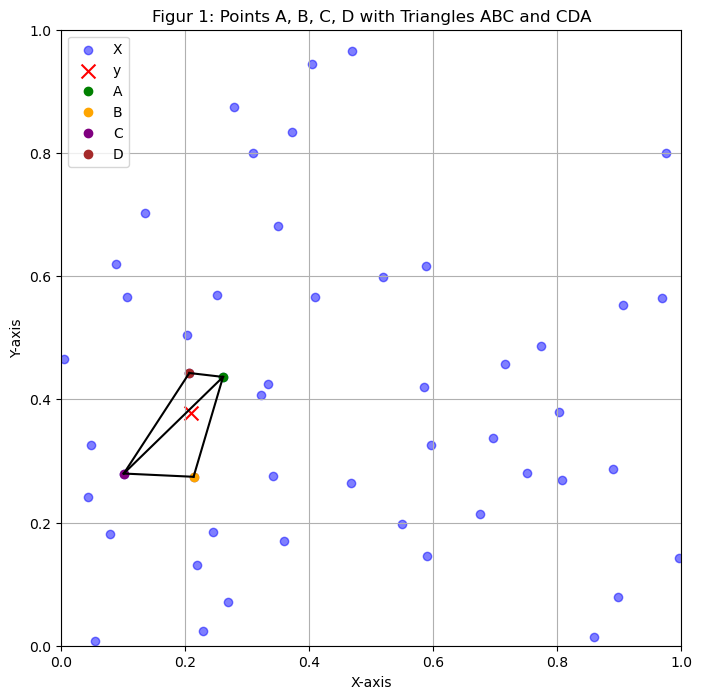

In [13]:
# The following code, illustrating X, y, the triangles ABC adn CDA  is provided by OpenAI (2024) ChatGPT 4o.
#"
# Plot the points and triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='X', c='blue', alpha=0.5)
plt.scatter(y[0], y[1], label='y', c='red', marker='x', s=100)
plt.scatter(A[0], A[1], label='A', c='green')
plt.scatter(B[0], B[1], label='B', c='orange')
plt.scatter(C[0], C[1], label='C', c='purple')
plt.scatter(D[0], D[1], label='D', c='brown')

# Draw triangles ABC and CDA
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')

# Add labels and legend
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Figur 1: Points A, B, C, D with Triangles ABC and CDA')
plt.grid(True)
plt.show()
#"

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [14]:
# Creating a function which calculates the Barycentric coordinates for the triangle ABC. 
def barycentric_coordinates_ABC(A, B, C, y):
    rABC1 = ((B[1]-C[1])*(y[0]-C[0])+ (C[0]-B[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+ (C[0]-B[0])*(A[1]-C[1]))
    rABC2 = ((C[1]-A[1])*(y[0]-C[0])+ (A[0]-C[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+ (C[0]-B[0])*(A[1]-C[1]))
    rABC3 = 1 - rABC1 - rABC2
    return rABC1, rABC2, rABC3

# Compute the barycentric coordinates of y with respect to triangle ABC.
rABC = barycentric_coordinates_ABC(A, B, C, y)

# Printing the solutions. 
print("Barycentric coordinates of y with respect to triangle ABC:")
print("r1:", rABC[0])
print("r2:", rABC[1])
print("r3:", rABC[2])

Barycentric coordinates of y with respect to triangle ABC:
r1: 0.6286263152916166
r2: 0.06910145494351515
r3: 0.3022722297648682


In [15]:
# Creating a function which calculates the Barycentric coordinates for the triangle CDA.
def barycentric_coordinates_CDA(C, D, A, y):
    rCDA1 = ((D[1]-A[1])*(y[0]-A[0])+ (A[0]-D[0])*(y[1]-D[1]))/((D[1]-A[1])*(C[0]-A[0])+ (A[0]-D[0])*(C[1]-A[1]))
    rCDA2 = ((A[1]-C[1])*(y[0]-A[0])+ (C[0]-A[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+ (A[0]-D[0])*(C[1]-A[1]))
    rCDA3 = 1 - rCDA1 - rCDA2
    return rCDA1, rCDA2, rCDA3

# Compute the barycentric coordinates of y with respect to triangle CDA
rCDA = barycentric_coordinates_CDA(C, D, A, y)

# Printing the solutions. 
print("Barycentric coordinates of y with respect to triangle CDA:")
print("r1:", rCDA[0])
print("r2:", rCDA[1])
print("r3:", rCDA[2])

Barycentric coordinates of y with respect to triangle CDA:
r1: 0.4045200561575641
r2: -0.13392661883334067
r3: 0.7294065626757765


Note, that rCDA[1] is negative which is how we see that y are on the outside of rCDA.

In [16]:
# Creating a function 'is_inside_triangle' that checks if a point is inside the triangles by returning the coordinates in r if they are between 0 and 1.
def is_inside_triangle(r):
    return all(0 <= ri <= 1 for ri in r)

# The barycentric coordinates in rABC and rCDA are applied to the "is_inside_triangle" function.
inside_ABC = is_inside_triangle(rABC)
inside_CDA = is_inside_triangle(rCDA)

# Approximate the function value at y using barycentric interpolation
if inside_ABC:
    f_y_approx = rABC[0] * A + rABC[1] * B + rABC[2] * C
    print("y is inside triangle ABC and the approximated coordinates for y are", f_y_approx)
elif inside_CDA:
    f_y_approx = rCDA[0] * C + rCDA[1] * D + rCDA[2] * A
    print("y is inside triangle CDA and the approximated coordinates for y are", f_y_approx)
else:
    f_y_approx = np.nan
    print("y is not inside any triangle and the approximated coordinates for y are", f_y_approx)

y is inside triangle ABC and the approximated coordinates for y are [0.20901926 0.37774759]


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [17]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [18]:
# Calculating the function, f values at points A, B, C, and D
f_A = f(A)
f_B = f(B)
f_C = f(C)
f_D = f(D)

# Computing the approximation of the function value at y using barycentric interpolation
f_ABC = rABC[0] * f_A + rABC[1] * f_B + rABC[2] * f_C
f_CDA = rCDA[0] * f_C + rCDA[1] * f_D + rCDA[2] * f_A

# Printing the approximations
print("Approximation of f(y) using triangle ABC:", f_ABC)
print("Approximation of f(y) using triangle CDA:", f_CDA)

# Comparing with the true value by inserting y in the function, f. 
f_y = f(y)
print("True value of f(y):", f_y)

Approximation of f(y) using triangle ABC: 0.08405201731052576
Approximation of f(y) using triangle CDA: 0.08211720790475897
True value of f(y): 0.0789565216259594


We see that the approximation of f(y) using triangle ABC is much better than CDA since the y is inside ABC.

**Question 4:** Repeat question 3 for all points in the set $Y$.

posx and posy should be finite values


y = (0.2, 0.2)
Approximation of f(y) using triangle ABC: 0.04032631372248057
Approximation of f(y) using triangle CDA: nan
True value of f(y): 0.04000000000000001
y = (0.8, 0.2)
Approximation of f(y) using triangle ABC: 0.15874233999349835
Approximation of f(y) using triangle CDA: nan
True value of f(y): 0.16000000000000003
y = (0.8, 0.8)
Approximation of f(y) using triangle ABC: nan
Approximation of f(y) using triangle CDA: nan
True value of f(y): 0.6400000000000001
y = (0.8, 0.2)
Approximation of f(y) using triangle ABC: 0.15874233999349835
Approximation of f(y) using triangle CDA: nan
True value of f(y): 0.16000000000000003
y = (0.5, 0.5)
Approximation of f(y) using triangle ABC: 0.2512901561119622
Approximation of f(y) using triangle CDA: nan
True value of f(y): 0.25


posx and posy should be finite values


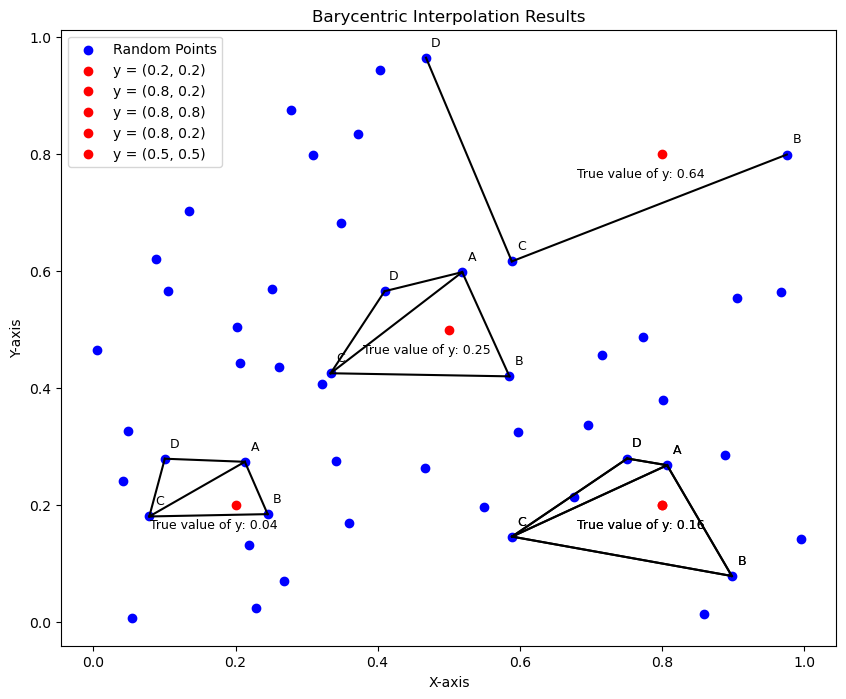

In [19]:
# The given Y
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)]
# Creating an empty list. 
results = []

for y in Y:
    # Using the function "finding_points" and the four conditions to create the solution for A, B, C, D for the y in Y.
    A = finding_points(X, y, condition[0])
    B = finding_points(X, y, condition[1])
    C = finding_points(X, y, condition[2])
    D = finding_points(X, y, condition[3])
    
    # Compute the barycentric coordinates of y in Y with respect to the triangles ABC and CDA.
    rABC = barycentric_coordinates_ABC(A, B, C, y)
    rCDA = barycentric_coordinates_CDA(C, D, A, y)

    # Calculating the function, f values at points A, B, C, and D
    f_A = f(A)
    f_B = f(B)
    f_C = f(C)
    f_D = f(D)

    # Computing the approximation of the function value at y using barycentric interpolation
    f_ABC = rABC[0] * f_A + rABC[1] * f_B + rABC[2] * f_C if is_inside_triangle(rABC) else np.nan
    f_CDA = rCDA[0] * f_C + rCDA[1] * f_D + rCDA[2] * f_A if is_inside_triangle(rCDA) else np.nan

    # Comparing with the true value by inserting y in the function, f. 
    f_y = f(y)
    
    # Printing the approximations and the true value
    print(f"y = {y}")
    print("Approximation of f(y) using triangle ABC:", f_ABC)
    print("Approximation of f(y) using triangle CDA:", f_CDA)
    print("True value of f(y):", f_y)
    
    # Storing the value to the empty list, "result"
    results.append((y, A, B, C, D, f_ABC, f_CDA, f_y))

# The following code, illustrating X, y, the different triangles ABC adn CDA for each y in Y is provided by OpenAI (2024) ChatGPT 4o.
# "
# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], label='Random Points', color='blue')
for y, A, B, C, D, f_ABC, f_CDA, f_y in results:
    plt.scatter(*y, label=f'y = {y}', color='red')
    
    # Draw triangles ABC and CDA
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
    plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
    plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
    plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
    plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')
    
    # Add labels for points A, B, C, and D with offsets
    plt.text(A[0] + 0.02, A[1] + 0.02, 'A', fontsize=9, ha='right')
    plt.text(B[0] + 0.02, B[1] + 0.02, 'B', fontsize=9, ha='right')
    plt.text(C[0] + 0.02, C[1] + 0.02, 'C', fontsize=9, ha='right')
    plt.text(D[0] + 0.02, D[1] + 0.02, 'D', fontsize=9, ha='right')
    
    plt.text(y[0] - 0.12, y[1] - 0.04, f'True value of y: {f_y:.2f}', fontsize=9, ha='left')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Barycentric Interpolation Results')
plt.show()
# "

The coordinates (0.2, 0.2), (0.8, 0.2), and (0.5, 0.5) are inside the ABC triangle, and their approximations are equal to the true values up to the second decimal place. The coordinate (0.8, 0.8) is not inside any triangle since the value of point A does not exist. 